In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell  # 显示所有输出
InteractiveShell.ast_node_interactivity = "all" 

data = pd.read_csv("films.csv")
# X = data[["Category","Time"]]

In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

features = ['Category']
for feature in features:  
    #非数字型和数字型标签值标准化
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])
data['Category']

LabelEncoder()

0      2
1      2
2      6
3     24
4      4
5     25
6     28
7     19
8      2
9      0
10    21
11    12
12    20
13    23
14     9
15     7
16     1
17     8
18    15
19     2
20    27
21    10
22    18
23    11
24    14
25     3
26     2
27    26
28     2
29    29
30    29
31    16
32    22
33     2
34     2
35    30
36     2
37    17
38    13
39     5
40     2
41    29
42     2
43    31
44    29
45    31
46    31
Name: Category, dtype: int64

In [3]:
X = data[["Category","Time"]]

<Figure size 900x600 with 0 Axes>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Time')

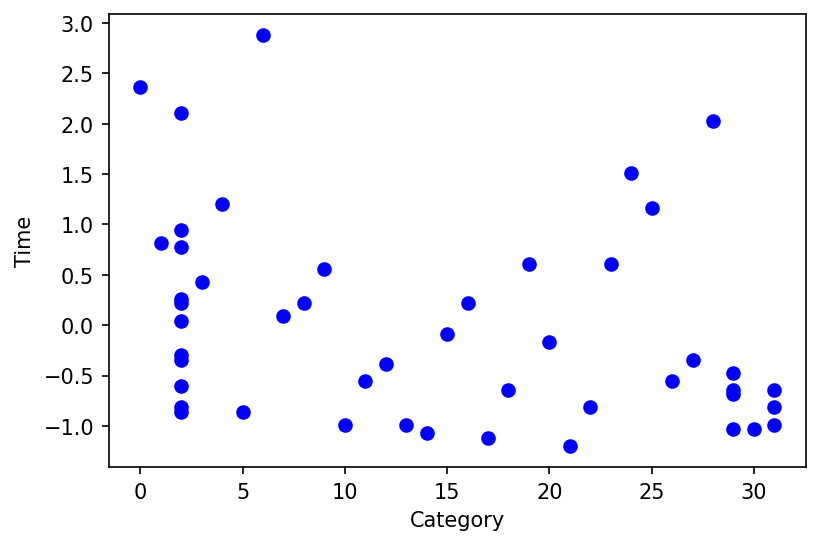

In [18]:
#Visualise data points
plt.figure(dpi=150)

plt.scatter(X["Category"],X["Time"],c='blue')
plt.xlabel('Category')
plt.ylabel('Time')
plt.savefig('C:\\Users\AoSun\Desktop\cluster\C-T cluster1.png',bbox_inches = 'tight')
plt.show()

In [5]:
from sklearn import preprocessing

In [6]:
X_scale = X.values[:,1]

In [7]:
X_scale

array([1.7       , 2.18333333, 2.93333333, 2.4       , 2.28333333,
       2.26666667, 2.6       , 2.05      , 2.63333333, 2.73333333,
       1.35      , 1.66666667, 1.75      , 2.05      , 2.03333333,
       1.85      , 2.13333333, 1.9       , 1.78333333, 2.11666667,
       1.68333333, 1.43333333, 1.56666667, 1.6       , 1.4       ,
       1.98333333, 1.58333333, 1.6       , 1.5       , 1.63333333,
       1.55      , 1.9       , 1.5       , 1.91666667, 1.48333333,
       1.41666667, 1.68333333, 1.38333333, 1.43333333, 1.48333333,
       1.9       , 1.41666667, 1.83333333, 1.5       , 1.56666667,
       1.56666667, 1.43333333])

In [8]:
scaler = preprocessing.StandardScaler().fit(X_scale.reshape(-1,1))

In [9]:
print(scaler.mean_)
print(scaler.scale_)

[1.81631206]
[0.38729054]


In [10]:
X_scaled = scaler.transform(X_scale.reshape(-1,1))

In [11]:
X_scale.reshape(-1,1).shape

(47, 1)

In [12]:
X_scaled.shape

(47, 1)

In [13]:
X_scaled_csv = pd.Series(X_scaled.reshape(1,-1)[0])
    # 将其重新格式化以导出到Kaggle
X['Time'] = pd.Series(X_scaled.reshape(1, -1)[0])

C:\Users\AoSun\AppData\Local\Temp/ipykernel_5108/3513185929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Time'] = pd.Series(X_scaled.reshape(1, -1)[0])


<Figure size 900x600 with 0 Axes>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Time')

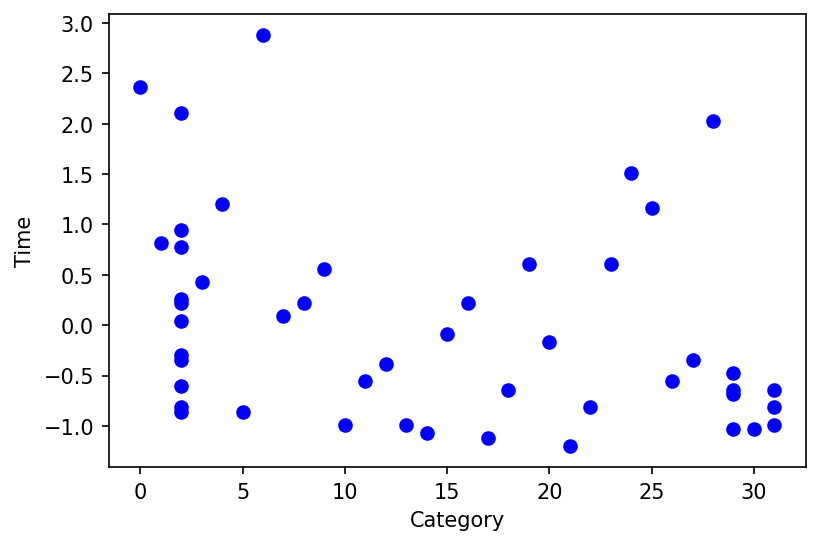

In [14]:
#Visualise data points
plt.figure(dpi=150)

plt.scatter(X["Category"],X["Time"],c='blue')
plt.xlabel('Category')
plt.ylabel('Time')
plt.savefig('C:\\Users\AoSun\Desktop\cluster\C-T cluster2.png')
plt.show()

<Figure size 900x600 with 0 Axes>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Time')

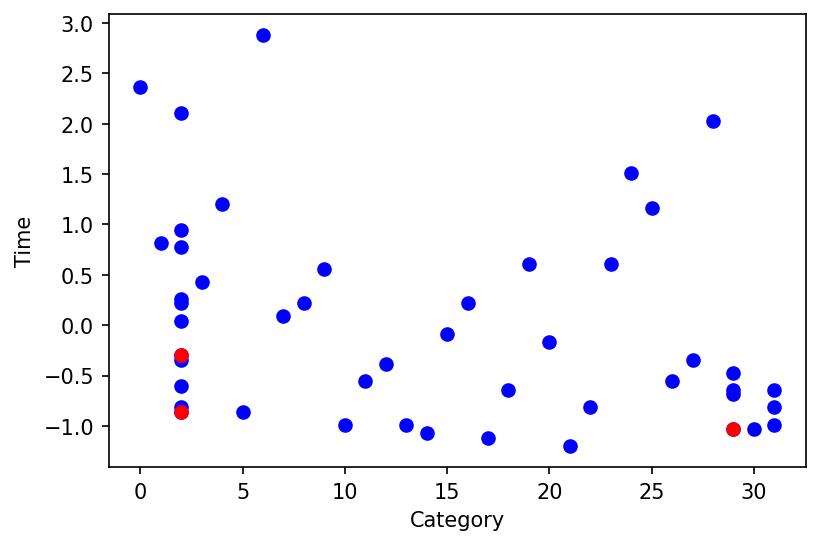

In [15]:
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K)) # 随机抽样三个点
plt.figure(dpi=150)

plt.scatter(X["Category"],X["Time"],c='blue')
plt.scatter(Centroids["Category"],Centroids["Time"],c='red')
plt.xlabel('Category')
plt.ylabel('Time')
plt.savefig('C:\\Users\AoSun\Desktop\cluster\C-T cluster3.png')
plt.show()

In [16]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1 
    for index1,row_c in Centroids.iterrows():
        ED=[]  # 记录每个点离质心的距离
        for index2,row_d in XD.iterrows():
            d1=(row_c["Category"]-row_d["Category"])**2
            d2=(row_c["Time"]-row_d["Time"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
           
        X[i]=ED  # 各个点离质心距离
        i=i+1
    
    C=[]
    for index,row in X.iterrows(): # 判断点离哪个质心最近
        min_dist=row[1]
        pos=1
        for i in range(K):  # i从0开始
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C   
    Centroids_new = X.groupby(["Cluster"]).mean()[["Time","Category"]]  # 求各簇的质心
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Time'] - Centroids['Time']).sum() + (Centroids_new['Category'] - Centroids['Category']).sum()
        print(diff.sum())  # 质心不再改变时停止
    Centroids = X.groupby(["Cluster"]).mean()[["Time","Category"]]

2.1340507101504973
2.839651819535236
1.6601165796453257
1.6537040225206041
0.0


C:\Users\AoSun\AppData\Local\Temp/ipykernel_5108/592688663.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED  # 各个点离质心距离


<Figure size 900x600 with 0 Axes>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Time')

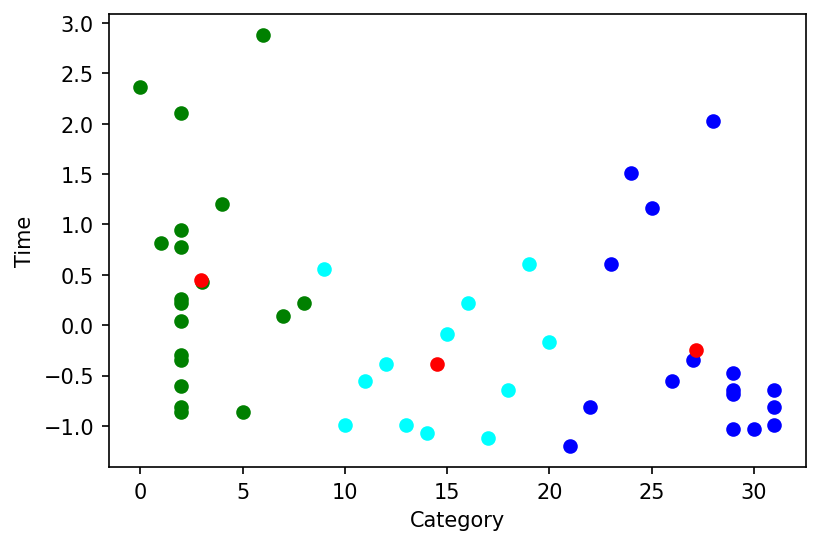

In [17]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4
plt.figure(dpi=150)

color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Category"],data["Time"],c=color[k])
plt.scatter(Centroids["Category"],Centroids["Time"],c='red')
plt.xlabel('Category')
plt.ylabel('Time')

plt.savefig('C:\\Users\AoSun\Desktop\cluster\C-T cluster4.png')
plt.show()